 # Using Classification to detect whether an individual has cancer or not
  

# Importing libraries or dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer_data = pd.read_csv("C:/Users/Georage/Downloads/archive (1)/beginner_datasets/cancer.csv")
cancer_data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


# Analyzing the data

In [3]:
cancer_data.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [5]:
cancer_data.shape

(683, 10)

In [6]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        683 non-null    int64
 1   age          683 non-null    int64
 2   menopause    683 non-null    int64
 3   tumor-size   683 non-null    int64
 4   inv-nodes    683 non-null    int64
 5   node-caps    683 non-null    int64
 6   deg-malig    683 non-null    int64
 7   breast       683 non-null    int64
 8   breast-quad  683 non-null    int64
 9   irradiat     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [7]:
cancer_data.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

# Visualising the data

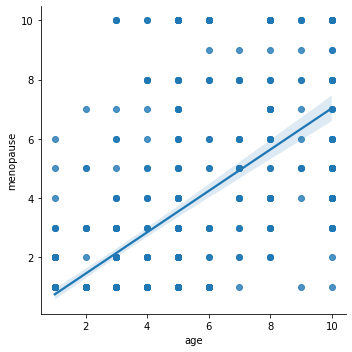

In [8]:
sns.lmplot(x='age', y = 'menopause' , data = cancer_data)

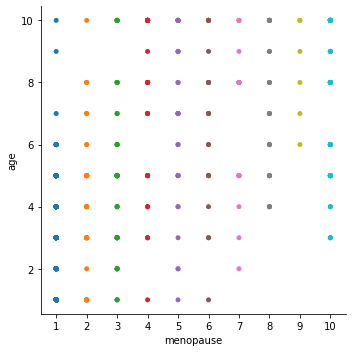

In [18]:
sns.catplot(data=cancer_data, x="menopause", y="age", jitter=False)

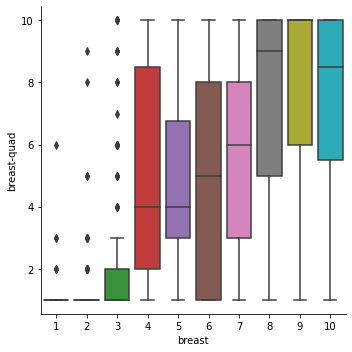

In [19]:
sns.catplot(data=cancer_data, x="breast", y="breast-quad", kind="box")

# Splitting the dataset

In [22]:
X = cancer_data.drop('Class', axis = 1)
y = cancer_data['Class']

# Training and testing the dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3 , random_state = 0)

In [24]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = lg.predict(X_test)

# Checking for the accuracy of the model

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       130
           1       0.95      0.93      0.94        75

    accuracy                           0.96       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.96      0.96      0.96       205

[[126   4]
 [  5  70]]
0.9560975609756097


In [28]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = d_tree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       130
           1       0.93      0.89      0.91        75

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.94      0.94      0.94       205

[[125   5]
 [  8  67]]
0.9365853658536586


In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = rfc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       130
           1       0.95      0.92      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205

[[126   4]
 [  6  69]]
0.9512195121951219


In [34]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train ,y_train)

GaussianNB()

In [35]:
y_pred= gb.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       130
           1       0.89      0.97      0.93        75

    accuracy                           0.95       205
   macro avg       0.94      0.95      0.94       205
weighted avg       0.95      0.95      0.95       205

[[121   9]
 [  2  73]]
0.9463414634146341


# from the model predictions it can be observed that the Logistic Regression is the algorithm with the highest accuracy and hence we implement that